In [1]:
#"C:\Users\user\Downloads\IMG_2549.jpeg"
#"C:\Users\user\Downloads\IMG_2548.jpeg"
#"C:\Users\user\Downloads\IMG_2550.jpeg"

In [22]:
!pip install japanize-matplotlib
!pip install Pillow

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib
from PIL import Image
import cv2

In [24]:
img_pink = Image.open(r"C:\Users\user\Downloads\IMG_2549.jpeg")
img_both = Image.open(r"C:\Users\user\Downloads\IMG_2548.jpeg")
img_black = Image.open(r"C:\Users\user\Downloads\IMG_2550.jpeg")

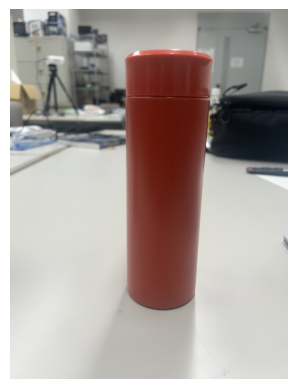

In [27]:
img_pink = cv2.imread(r"C:\Users\user\Downloads\IMG_2549.jpeg")
img_both = cv2.imread(r"C:\Users\user\Downloads\IMG_2548.jpeg")
img_black = cv2.imread(r"C:\Users\user\Downloads\IMG_2550.jpeg")

img_pink = cv2.cvtColor(img_pink, cv2.COLOR_BGR2RGB)
img_both = cv2.cvtColor(img_both, cv2.COLOR_BGR2RGB)
img_black = cv2.cvtColor(img_black, cv2.COLOR_BGR2RGB)

plt.imshow(img_pink)
plt.axis('off')  # 軸を非表示にする（お好みで）
plt.show()

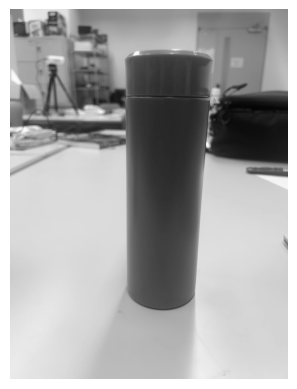

In [30]:
# グレースケール変換
img_pink_to_gray = cv2.cvtColor(img_pink, cv2.COLOR_RGB2GRAY)

# 画像の確認
plt.imshow(img_pink_to_gray, cmap='gray')
plt.axis('off')
plt.show()

In [31]:
# Sobel　フィルタを適用してエッジを検出
sobel_x = cv2.Sobel(img_pink_to_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_pink_to_gray, cv2.CV_64F, 0, 1, ksize=3)

In [34]:
print(sobel_x)
print("------")
print(sobel_y)

[[  0.   0.   0. ...  -6. -10.   0.]
 [  0.   0.   0. ...  -6.  -9.   0.]
 [  0.   0.   0. ...  -6.  -8.   0.]
 ...
 [  0.   0.   0. ...  -2.  -3.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   2.   2.   0.]]
------
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -6. -5. -4.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  2.]
 [ 0.  0.  0. ...  2.  6.  8.]
 [ 0.  0.  0. ...  0.  0.  0.]]


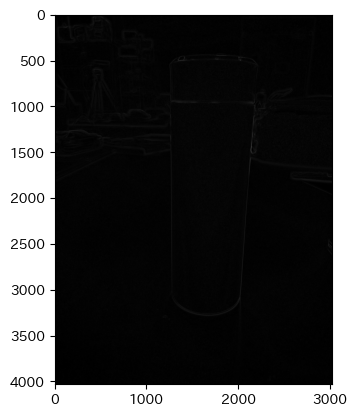

In [44]:
# sobel_x と sobel_y を絶対値に変換してから合成する
sobel_combined = cv2.addWeighted(np.absolute(sobel_x), 0.5, np.absolute(sobel_y), 0.5, 0)

# 画像の確認
plt.imshow(sobel_combined, cmap='gray')
plt.show()